In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [2]:
iris = load_iris()
X = iris.data
for x in X:
    print(x)

[5.1 3.5 1.4 0.2]
[4.9 3.  1.4 0.2]
[4.7 3.2 1.3 0.2]
[4.6 3.1 1.5 0.2]
[5.  3.6 1.4 0.2]
[5.4 3.9 1.7 0.4]
[4.6 3.4 1.4 0.3]
[5.  3.4 1.5 0.2]
[4.4 2.9 1.4 0.2]
[4.9 3.1 1.5 0.1]
[5.4 3.7 1.5 0.2]
[4.8 3.4 1.6 0.2]
[4.8 3.  1.4 0.1]
[4.3 3.  1.1 0.1]
[5.8 4.  1.2 0.2]
[5.7 4.4 1.5 0.4]
[5.4 3.9 1.3 0.4]
[5.1 3.5 1.4 0.3]
[5.7 3.8 1.7 0.3]
[5.1 3.8 1.5 0.3]
[5.4 3.4 1.7 0.2]
[5.1 3.7 1.5 0.4]
[4.6 3.6 1.  0.2]
[5.1 3.3 1.7 0.5]
[4.8 3.4 1.9 0.2]
[5.  3.  1.6 0.2]
[5.  3.4 1.6 0.4]
[5.2 3.5 1.5 0.2]
[5.2 3.4 1.4 0.2]
[4.7 3.2 1.6 0.2]
[4.8 3.1 1.6 0.2]
[5.4 3.4 1.5 0.4]
[5.2 4.1 1.5 0.1]
[5.5 4.2 1.4 0.2]
[4.9 3.1 1.5 0.2]
[5.  3.2 1.2 0.2]
[5.5 3.5 1.3 0.2]
[4.9 3.6 1.4 0.1]
[4.4 3.  1.3 0.2]
[5.1 3.4 1.5 0.2]
[5.  3.5 1.3 0.3]
[4.5 2.3 1.3 0.3]
[4.4 3.2 1.3 0.2]
[5.  3.5 1.6 0.6]
[5.1 3.8 1.9 0.4]
[4.8 3.  1.4 0.3]
[5.1 3.8 1.6 0.2]
[4.6 3.2 1.4 0.2]
[5.3 3.7 1.5 0.2]
[5.  3.3 1.4 0.2]
[7.  3.2 4.7 1.4]
[6.4 3.2 4.5 1.5]
[6.9 3.1 4.9 1.5]
[5.5 2.3 4.  1.3]
[6.5 2.8 4.6 1.5]
[5.7 2.8 4

In [5]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)


def update_centroids(X, clusters, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        cluster_points = X[clusters == k]
        centroids[k] = np.mean(cluster_points, axis=0)
    return centroids

def k_means(X, K, max_iterations=100):
    random_indices = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[random_indices]

    for i in range(max_iterations):
        clusters = assign_clusters(X, centroids)
        
        new_centroids = update_centroids(X, clusters, K)
        
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids

    return centroids, clusters


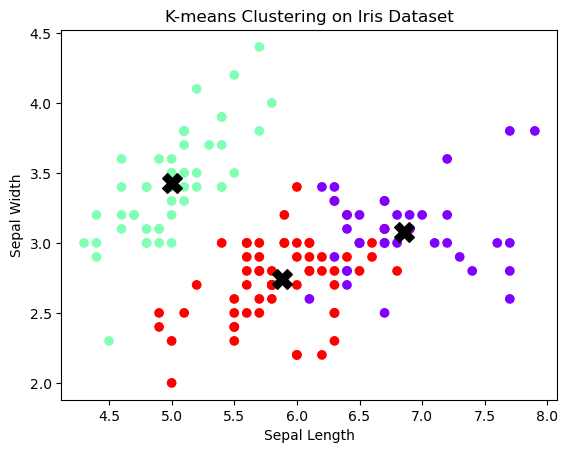

In [6]:
K = 3
centroids, clusters = k_means(X, K)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering on Iris Dataset')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

def k_means(X, K, max_iterations=100, plot_steps=False):
    # Randomly initialize K centroids
    random_indices = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[random_indices]

    for i in range(max_iterations):
        # Assign data points to the closest centroid
        clusters = assign_clusters(X, centroids)
        
        # Update centroids based on the mean of data points in each cluster
        new_centroids = update_centroids(X, clusters, K)
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

        if plot_steps:
            # Visualize the clusters and centroids
            plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow')
            plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black')
            plt.xlabel('Sepal Length')
            plt.ylabel('Sepal Width')
            plt.title(f'K-means Clustering - Iteration {i+1}')
            plt.show()

    return centroids, clusters

K = 3  # Number of clusters (since Iris dataset has 3 classes)
centroids, clusters = k_means(X, K, plot_steps=True)
